# p.50 연습
감독자의 체질검사 데이터를 활용하여 체질 비만도를 예측하기 위한 다중선형 회귀분석을 실시하고 결과를 해석하시오.
* 목표변수 FAT(연속형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [3]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# Regression
from statsmodels.formula.api import ols
# qqplot, 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형모델 formula
import statsmodels.formula.api as smf
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 데이터 분리
from sklearn.model_selection import train_test_split
# StandardScaler
from sklearn.preprocessing import StandardScaler
# LinearRegression
from sklearn.linear_model import LinearRegression as LR
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [4]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### 데이터 분리

In [5]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print('train data :', df_train.shape)
print('test data :', df_test.shape)

train data : (176, 14)
test data : (76, 14)


# Step 2. 변수 간의 경향성 파악

### 산점도 행렬

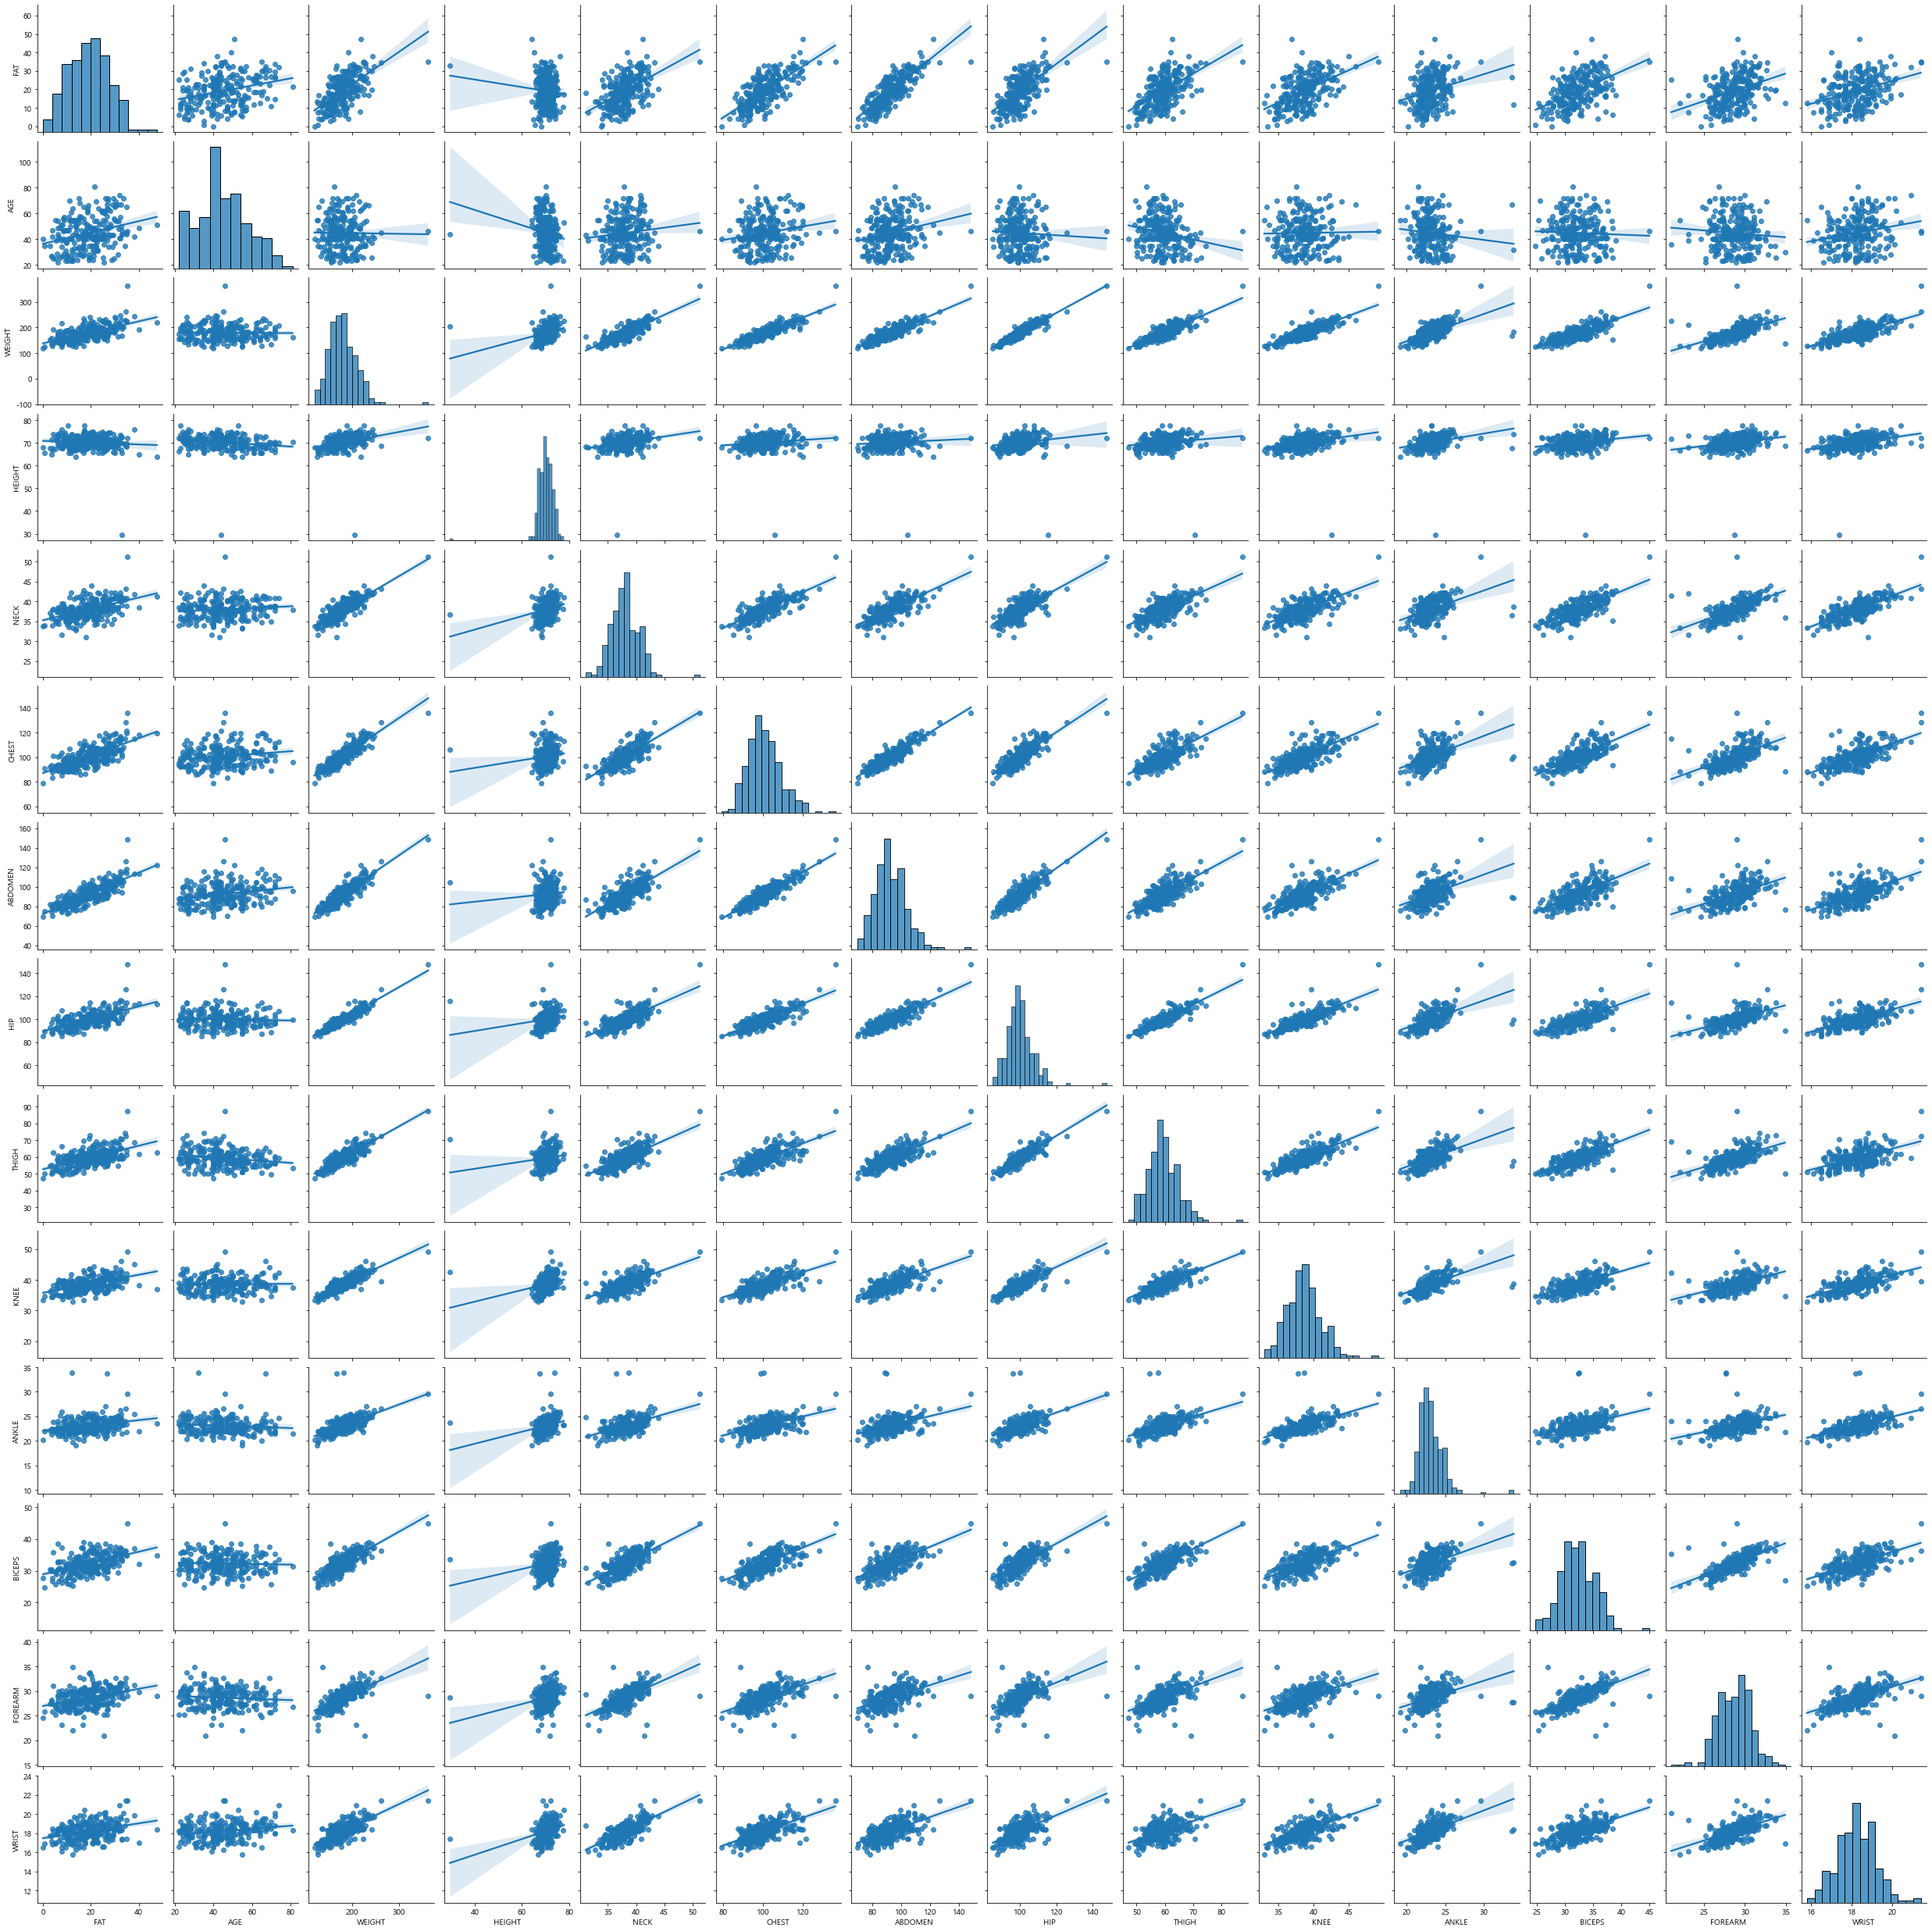

In [6]:
sns.pairplot(df_raw, kind = 'reg')

### 상관계수

In [7]:
df_raw.corr().round(4)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.0000,0.2915,0.6124,-0.0895,0.4906,0.7026,0.8134,0.6252,0.5596,0.5087,0.2660,0.4933,0.3614,0.3466
AGE,0.2915,1.0000,-0.0127,-0.1716,0.1135,0.1764,0.2304,-0.0503,-0.2001,0.0175,-0.1051,-0.0412,-0.0851,0.2135
WEIGHT,0.6124,-0.0127,1.0000,0.3083,0.8307,0.8942,0.8880,0.9409,0.8687,0.8532,0.6137,0.8004,0.6303,0.7298
HEIGHT,-0.0895,-0.1716,0.3083,1.0000,0.2537,0.1349,0.0878,0.1704,0.1484,0.2861,0.2647,0.2078,0.2286,0.3221
NECK,0.4906,0.1135,0.8307,0.2537,1.0000,0.7848,0.7541,0.7350,0.6957,0.6724,0.4779,0.7311,0.6237,0.7448
CHEST,0.7026,0.1764,0.8942,0.1349,0.7848,1.0000,0.9158,0.8294,0.7299,0.7195,0.4830,0.7279,0.5802,0.6602
ABDOMEN,0.8134,0.2304,0.8880,0.0878,0.7541,0.9158,1.0000,0.8741,0.7666,0.7372,0.4532,0.6850,0.5033,0.6198
HIP,0.6252,-0.0503,0.9409,0.1704,0.7350,0.8294,0.8741,1.0000,0.8964,0.8235,0.5584,0.7393,0.5450,0.6301
THIGH,0.5596,-0.2001,0.8687,0.1484,0.6957,0.7299,0.7666,0.8964,1.0000,0.7992,0.5398,0.7615,0.5668,0.5587
KNEE,0.5087,0.0175,0.8532,0.2861,0.6724,0.7195,0.7372,0.8235,0.7992,1.0000,0.6116,0.6787,0.5559,0.6645


* 목표변수(FAT)와 설명변수(CHEST, ABDOMEN 등) 간의 높은 선형관계 확인
* 다수 설명변수 간의 선형관계 확인 : 다중공선성 확인 및 처리 필요

# Step 3. 회귀 모델 생성

### 다중선형 회귀분석

In [8]:
lr_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST',
                   data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.45
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           9.76e-45
Time:                        10:28:12   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1018.
Df Residuals:                     162   BIC:                             1063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8408     20.905     -1.714      0.0

### 다중공선성 확인

In [9]:
# 설명변수 데이터 생성
df_train_x = df_train.drop('FAT', axis = 1)
# 상수항 추가
df_train_x_const = add_constant(df_train_x)
# DataFrame 형태 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF', ascending = False).round(2)

,variable,VIF
0,const,4351.57
2,WEIGHT,37.21
7,HIP,16.56
6,ABDOMEN,13.22
5,CHEST,10.72
8,THIGH,8.96
9,KNEE,5.13
4,NECK,4.25
13,WRIST,3.50
11,BICEPS,3.45


* WEIGHT의 VIF가 높게 나타나 모델에서 제외

### WEIGHT 제외한 모델

In [10]:
lr_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST',
                   data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     43.77
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           9.84e-45
Time:                        10:29:30   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1021.
Df Residuals:                     163   BIC:                             1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2082      8.590      0.257      0.7

### WEIGHT 제외한 모델 다중공선성 확인

In [11]:
# 설명변수 데이터 생성
df_train_x = df_train.drop(['FAT','WEIGHT'], axis = 1)
# 상수항 추가
df_train_x_const = add_constant(df_train_x)
# DataFrame 형태 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF', ascending = False).round(2)

,variable,VIF
0,const,721.58
5,ABDOMEN,12.90
6,HIP,11.90
7,THIGH,8.94
4,CHEST,8.80
8,KNEE,4.64
3,NECK,3.77
12,WRIST,3.40
10,BICEPS,3.37
1,AGE,2.33


* ABDOMEN의 VIF가 높게 나타나지만 목표변수에 영향이 가장 큰 변수로 제거하지 않음

### 유의하지 않은 변수 하나씩 반복 제거

In [12]:
lr_model = smf.ols(formula = 'FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM',
                    data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.18e-49
Time:                        10:30:54   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

### 다중공선성 최종 확인

In [14]:
# 설명변수 데이터 생성
df_train_x = df_train[['HEIGHT','NECK','ABDOMEN','HIP','FOREARM']]
# 상수항 추가
df_train_x_const = add_constant(df_train_x)
# DataFrame 형태 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF', ascending = False).round(2)

,variable,VIF
0,const,516.31
4,HIP,4.95
3,ABDOMEN,4.91
2,NECK,2.87
5,FOREARM,1.57
1,HEIGHT,1.14


# Step 4. 오차의 기본 가정 검토

### 독립성 검정

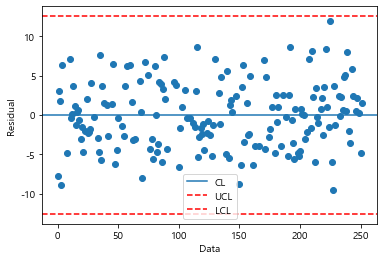

In [15]:
plt.scatter(df_train.index, lr_result.resid)
plt.xlabel('Data')
plt.ylabel('Residual')
plt.axhline(y = 0, linestyle = '-', label = 'CL')
plt.axhline(y = 3 * np.std(lr_result.resid), linestyle = '--', color = 'red', label = 'UCL')
plt.axhline(y = -3 * np.std(lr_result.resid), linestyle = '--', color = 'red', label = 'LCL')
plt.legend()

* 잔차가 y = 0 을 기준으로 관리 상하한을 벗어나지 않고 랜덤하게 산포되어 있으므로 독립성 만족

### 등분산성 검정

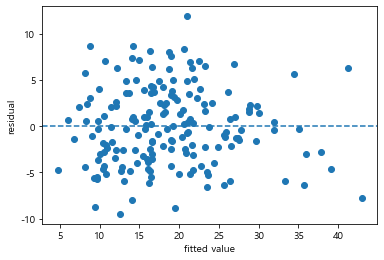

In [16]:
plt.scatter(lr_result.fittedvalues, lr_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

* 잔차가 y = 0 을 기준으로 랜덤하게 산포되어 있으므로 등분산성 만족

### 정규성 검정

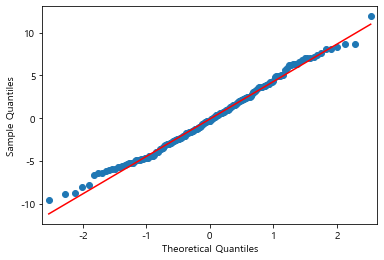

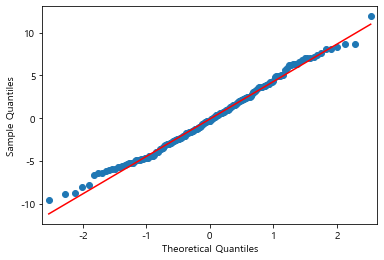

In [17]:
qqplot(lr_result.resid, line = 'q')

* 정규분포 직선(적색 선)을 중심으로 분포하므로 정규성 만족

# Step 5. 결론

### 회귀 모델 성능 확인

In [18]:
train_pred = lr_result.predict(df_train)
test_pred = lr_result.predict(df_test)
print('train data R-squared :', ((r2_score(df_train['FAT'], train_pred)) * 100).round(2))
print('test data R-squared :', ((r2_score(df_test['FAT'], test_pred)) * 100).round(2))

train data R-squared : 75.05
test data R-squared : 65.75


### 변수 중요도 확인

<AxesSubplot:>

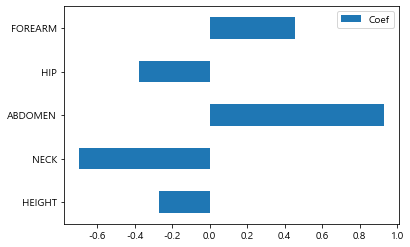

In [19]:
df_lr_coef = pd.DataFrame({'Coef' : lr_result.params.values[1:]}, index = ['HEIGHT','NECK','ABDOMEN','HIP','FOREARM'])
df_lr_coef.plot.barh(y = 'Coef')

* FOREARM과 ABDOMEN이 클수록 FAT가 높아진다는 것을 확인할 수 있다.